In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import lifelines

In [2]:
data = pd.read_csv("Churn Modeling.csv")

Data Preparation

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,9997.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.496849,38.943500,5.015400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.708600,10.613726,2.902931,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,305.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.250000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,865.000000,190.000000,30.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Remove Outliers

In [6]:
data = data[data.Age != 190]
data = data[data.Tenure != 30]
data.shape

(9998, 14)

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.000000,9.998000e+03,9995.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,5001.496699,1.569094e+07,650.532266,38.929386,5.012503,76489.682551,1.529906,0.705541,0.515203,100094.480754,0.203641
std,2886.324035,7.194247e+04,96.676016,10.506242,2.892171,62397.765659,0.581169,0.455822,0.499794,57512.616805,0.402725
min,1.000000,1.556570e+07,305.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2502.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51012.472500,0.000000
50%,5001.500000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.750000,1.575324e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149395.882500,0.000000
max,10000.000000,1.581569e+07,865.000000,101.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
#Check target
data['Exited'].value_counts()

0    7962
1    2036
Name: Exited, dtype: int64

In [9]:
data.groupby('Exited').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5025.322532,1.569117e+07,651.866692,37.416478,5.032781,72754.433340,1.544210,0.707234,0.554635,99746.091476
1,4908.323183,1.569007e+07,645.315815,44.845776,4.933202,91096.781871,1.473969,0.698919,0.361002,101456.895015


In [10]:
#Check for missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        3
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
#Fill missing values with the mean
mean_cs = np.mean(data.CreditScore)
data.CreditScore.fillna(mean_cs,inplace=True)

In [12]:
#Check for dulicate customers
data[data.duplicated(['CustomerId'])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


Exploratory Data Analysis

In [13]:
numerical = [
  'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary'
]
categorical = [
  'Geography', 'Gender','Exited'
]


In [14]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

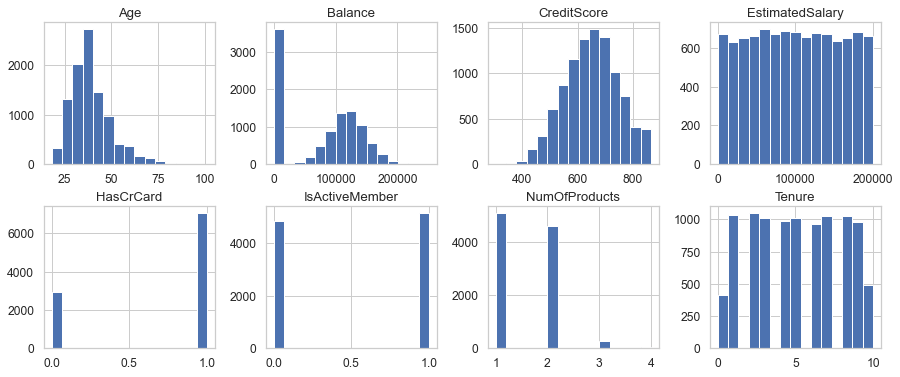

In [15]:
data[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

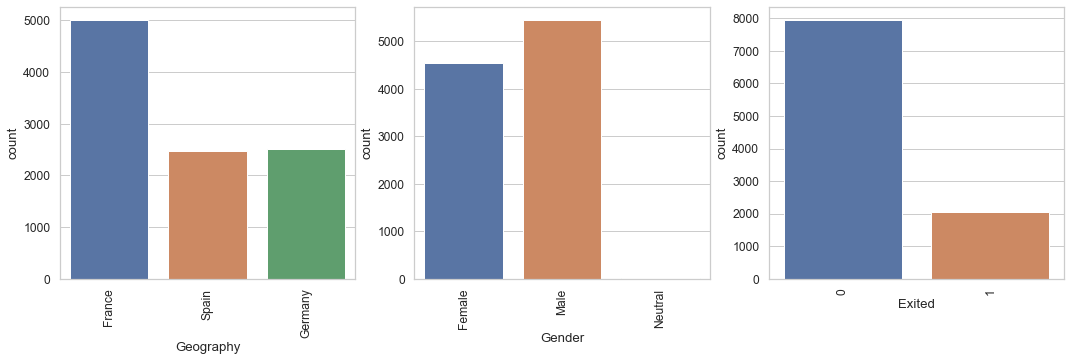

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Explore Relationships with Exited

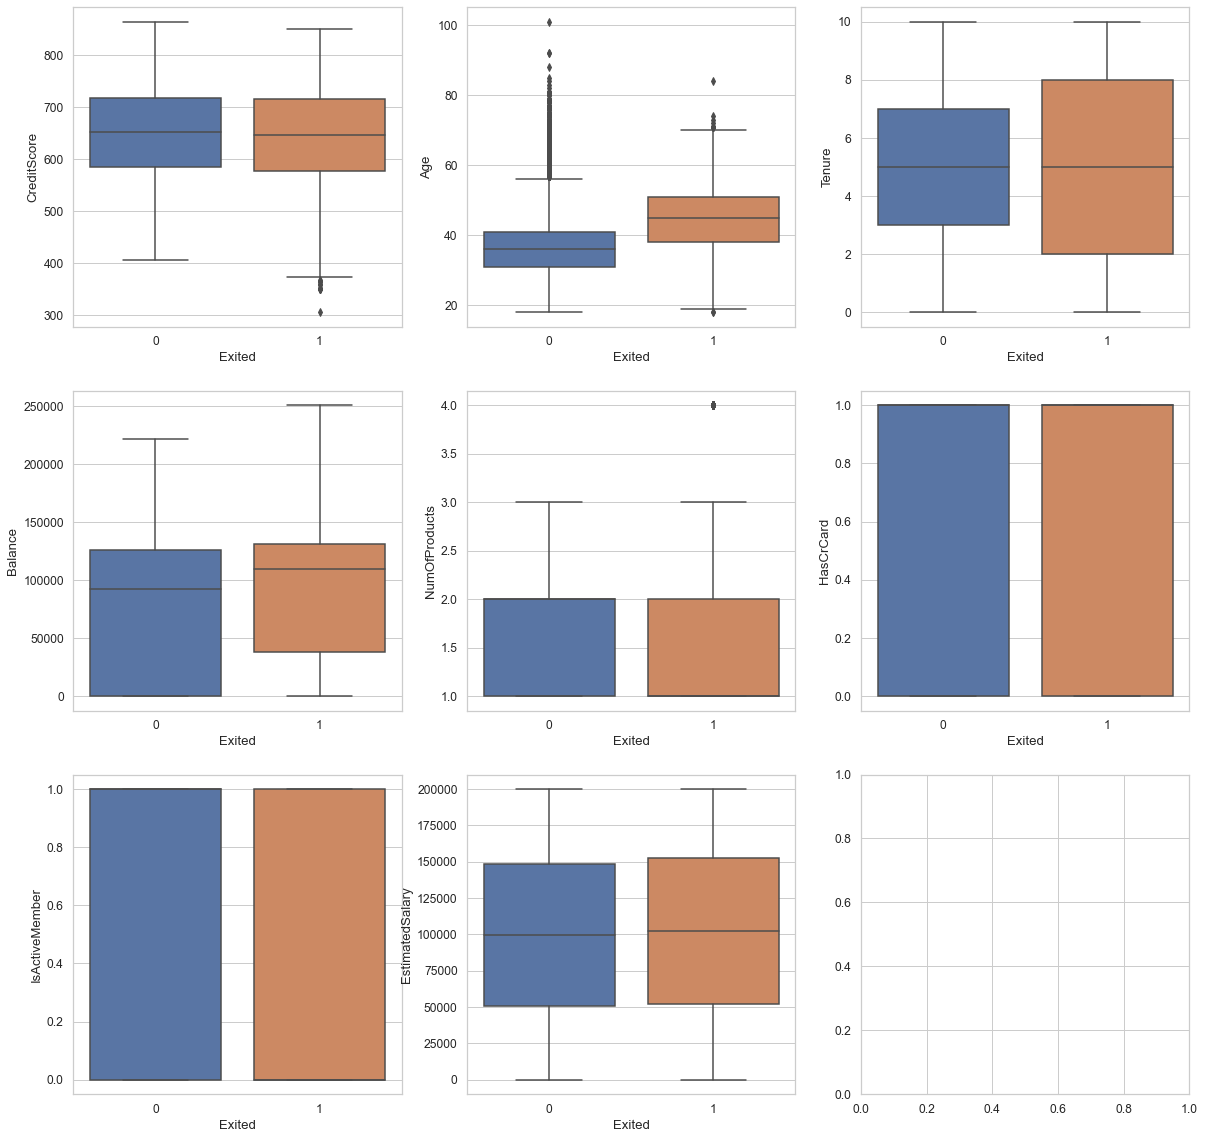

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x='Exited', y=var, data=data, ax=subplot)

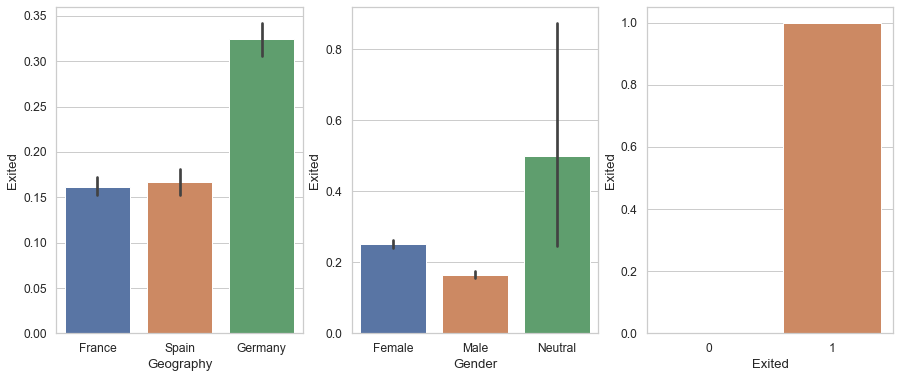

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
for var, subplot in zip(categorical, ax.flatten()):
    sns.barplot(x=var, y='Exited', data=data, ax=subplot)

Data Pre-processing for modeling 

In [19]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
#Drop uninformative columns
train = data.copy()
train = train.drop(
    ['RowNumber','Surname'], axis=1)
train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
train = train.set_index('CustomerId')
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
def Balance_Recode(x):
    if (x == 0):
        return(1)
    elif (x > 0):
        return(0)
    
train['Zero_Balance'] = train['Balance'].map(Balance_Recode)

In [23]:
#Create dummy vars 
train = pd.get_dummies(train, drop_first=True)
train.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance,Geography_Germany,Geography_Spain,Gender_Male,Gender_Neutral
CustomerId,,,,,,,,,,,,,,
15634602,619.0,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,0
15647311,608.0,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0,0
15619304,502.0,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0


In [24]:
train = train[['CreditScore', 'Gender_Male', 'Gender_Neutral','Age', 'Geography_Germany','Geography_Spain','Zero_Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Tenure','Exited']]

In [25]:
# Find Pearson correlations with the target and sort
correlations = train.corr()['Exited'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 EstimatedSalary      0.011980
Gender_Neutral       0.020825
Geography_Germany    0.173182
Age                  0.284780
Exited               1.000000
Name: Exited, dtype: float64

Most Negative Correlations: 
 IsActiveMember    -0.156026
Zero_Balance      -0.122181
Gender_Male       -0.106866
Geography_Spain   -0.052595
NumOfProducts     -0.048674
Name: Exited, dtype: float64


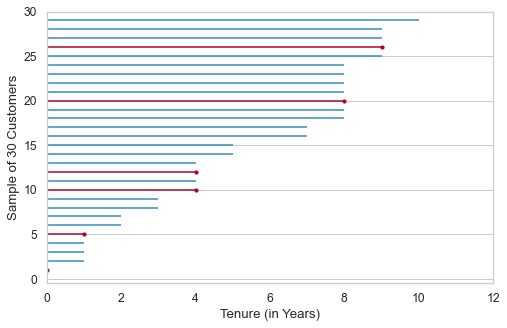

In [26]:
# plot "lifelines" of the study participants as they attempt to avoid recidivism
train_sample = train.sample(n=30)

duration = train_sample.Tenure.values
Exited = train_sample.Exited.values

ax = lifelines.plotting.plot_lifetimes(duration, event_observed=Exited)
ax.set_xlim(0, 12)
ax.grid(axis='x')
#ax.vlines(10, 0, 25, lw=2, linestyles='--')
ax.set_xlabel("Tenure (in Years)")
ax.set_ylabel("Sample of 30 Customers")
# ax.set_title("Customer Churn");
plt.plot();


# Modeling using Cox Regression

Hyperparameter Selection

In [27]:
train_ch, test_ch = train_test_split(train, test_size=0.30, random_state=42)

In [28]:
from lifelines import CoxPHFitter

strata_cols = ['Gender_Neutral']

cph_l4 = CoxPHFitter(penalizer=0.1, l1_ratio=1.).fit(train_ch, duration_col='Tenure', event_col='Exited',strata=strata_cols)
cph_l3 = CoxPHFitter(penalizer=0.1, l1_ratio=0.75).fit(train_ch, duration_col='Tenure', event_col='Exited',strata=strata_cols)
cph_l2 = CoxPHFitter(penalizer=0.1, l1_ratio=0.5).fit(train_ch, duration_col='Tenure', event_col='Exited',strata=strata_cols)
cph_l1 = CoxPHFitter(penalizer=0.0, l1_ratio=0.).fit(train_ch, duration_col='Tenure', event_col='Exited',strata=strata_cols)


#log-likelihood on out-of-sample data. Want to maximize
print(cph_l4.score(test_ch))
print(cph_l3.score(test_ch)) 
print(cph_l2.score(test_ch))
print(cph_l1.score(test_ch)) #Best

-1.3678313893864527
-1.3617740034601618
-1.3557739025224294
-1.343342269656515


Modeling

In [29]:
cph = lifelines.CoxPHFitter(penalizer = 0.0)


strata_cols = ['Gender_Neutral','Geography_Spain']

cph.fit(train, duration_col='Tenure', event_col='Exited', show_progress=False, strata=strata_cols)


cph.print_summary()
print('Concordance_index_: {:.2f}'.format(cph.concordance_index_))

Concordance_index_: 0.72


Check Assumptions

In [30]:
cph.check_assumptions(train, show_plots=True)

Proportional hazard assumption looks okay.


Export hazards and survival predictions

In [31]:
haz_ratios = cph.hazard_ratios_
haz_CIs = cph.confidence_intervals_
baseline_hazard = cph.baseline_hazard_
pred_median_haz = cph.predict_median(train)
pred_partial_haz = cph.predict_partial_hazard(train)
Pred_survival_func = cph.predict_survival_function(train)
exp_lifetime = cph.predict_expectation(train)

#Export to xlsx
writer = pd.ExcelWriter('C:/Users/marca/OneDrive/Desktop/Case Study/Cox_Regression_Data.xlsx', engine='xlsxwriter')
haz_ratios.to_excel(writer, sheet_name='haz_ratios')
haz_CIs.to_excel(writer, sheet_name='haz_CIs')
baseline_hazard.to_excel(writer, sheet_name='baseline_haz')
pred_median_haz.to_excel(writer, sheet_name='pred median_haz')
pred_partial_haz.to_excel(writer, sheet_name='pred partial_haz')
Pred_survival_func.to_excel(writer, sheet_name='Pred_survival_func')
exp_lifetime.to_excel(writer, sheet_name='exp_lifetime')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [32]:
summary = cph.print_summary()

Plot Graphs

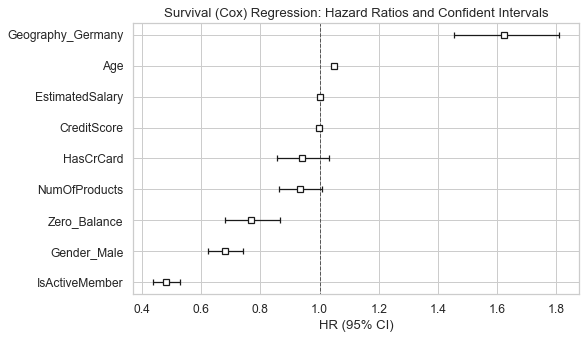

In [33]:
fig_coef, ax_coef = plt.subplots()
ax_coef.set_title('Survival (Cox) Regression: Hazard Ratios and Confident Intervals')
cph.plot(ax=ax_coef, hazard_ratios=True);

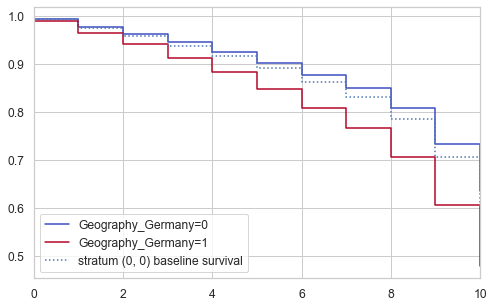

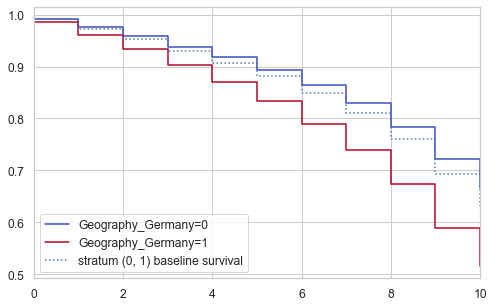

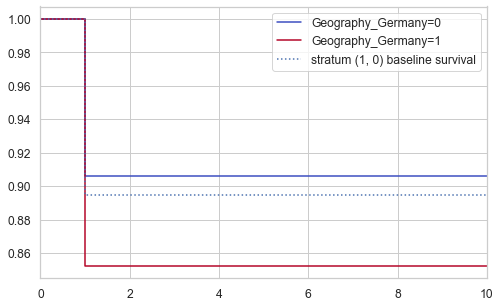

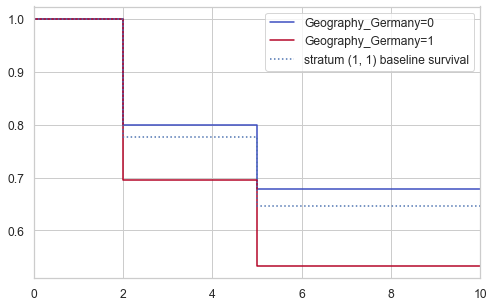

In [34]:
cph.plot_covariate_groups('Geography_Germany', values=[0, 1], cmap='coolwarm')

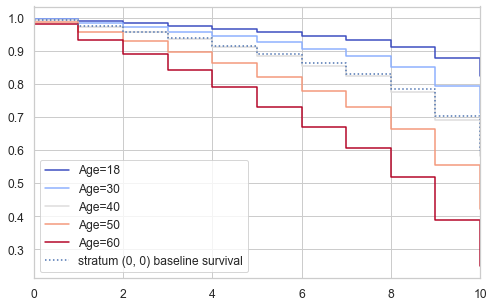

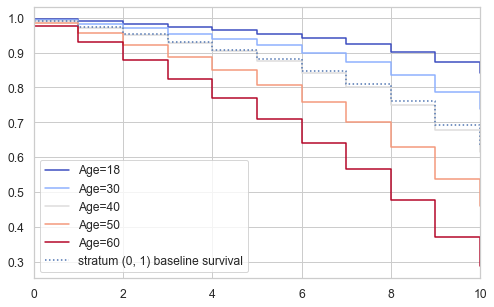

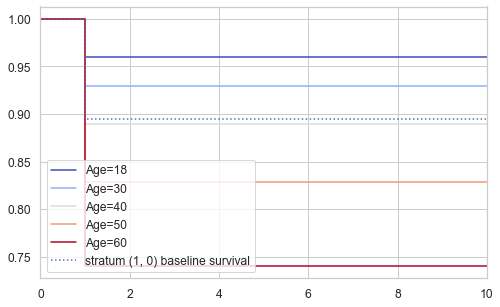

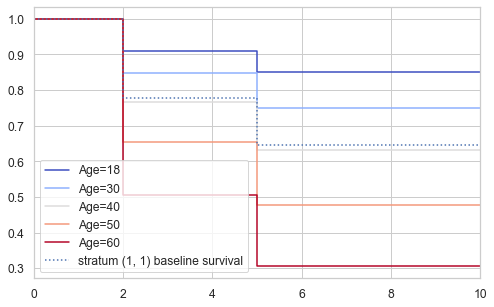

In [35]:
cph.plot_covariate_groups('Age', values=[18,30,40,50,60], cmap='coolwarm')

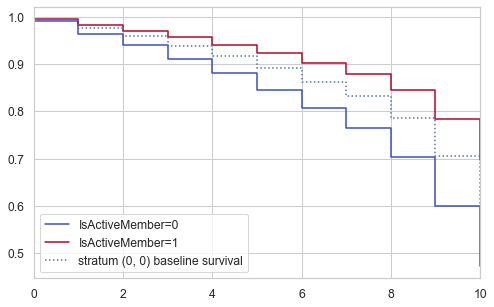

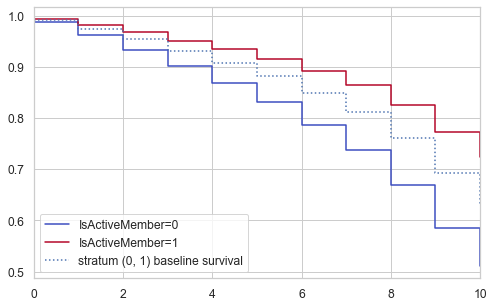

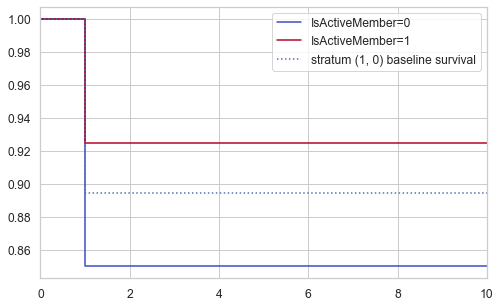

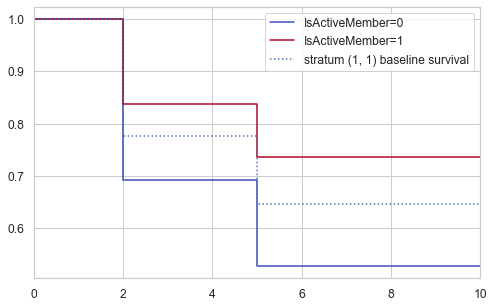

In [36]:
cph.plot_covariate_groups('IsActiveMember', values=[0,1], cmap='coolwarm')

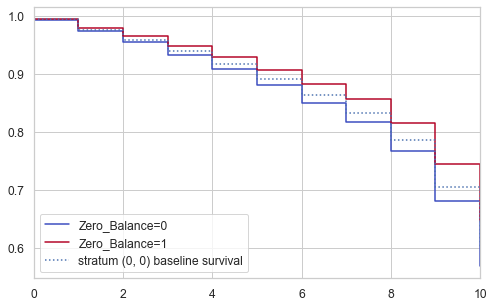

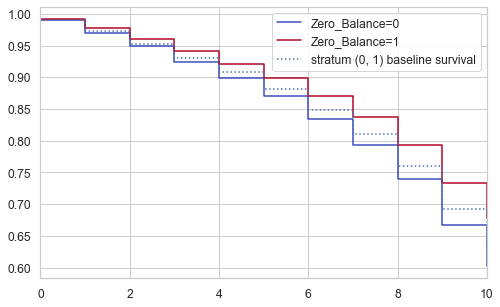

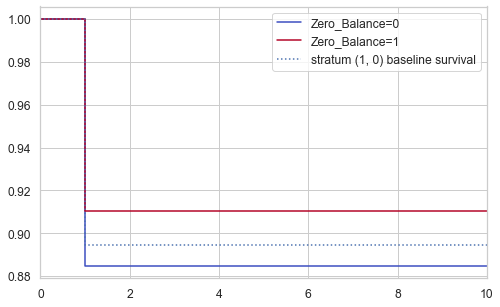

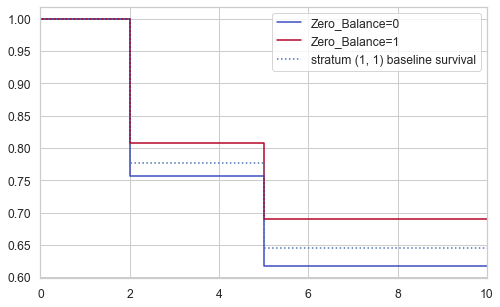

In [37]:
cph.plot_covariate_groups('Zero_Balance', values=[0,1], cmap='coolwarm')

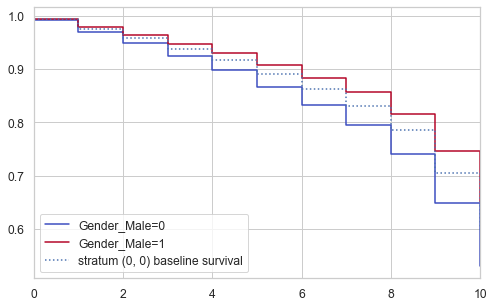

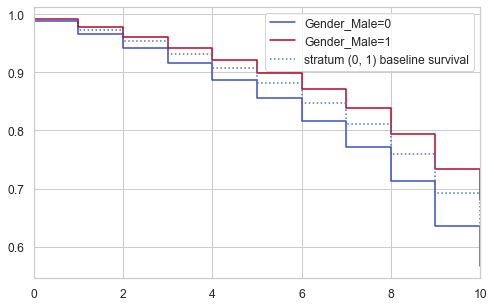

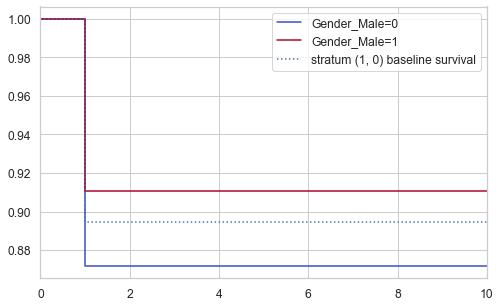

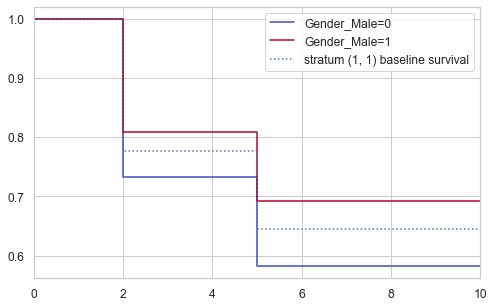

In [38]:
cph.plot_covariate_groups('Gender_Male', values=[0,1], cmap='coolwarm')